<a href="https://colab.research.google.com/github/Gurdeep-kaur533/Heart-Failure-Records/blob/main/heartFailureRecord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [6]:
from google.colab import files
uploaded = files.upload()

Saving scaler.joblib to scaler (1).joblib


In [7]:
from google.colab import files
uploaded = files.upload()

Saving model.joblib to model (1).joblib


In [11]:
# Step 2: Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/Gurdeep-kaur533/Heart-Failure-Records/refs/heads/main/heart_failure_data.csv")  # Use your cleaned CSV version
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
# Step 3: Data Preprocessing
print(df.isnull().sum())  # Check for nulls

# If needed:
# df = df.dropna()  # Drop rows with missing values

# Features and target
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


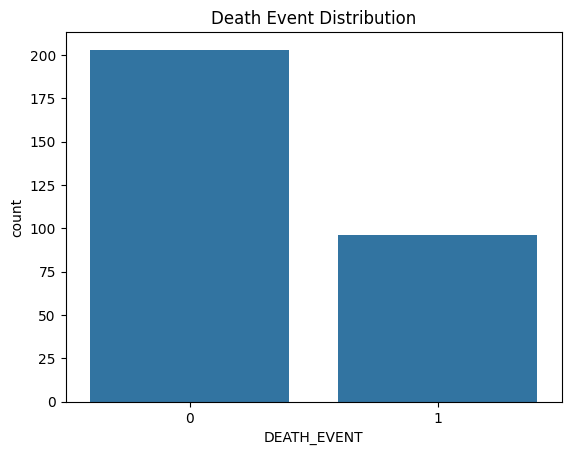

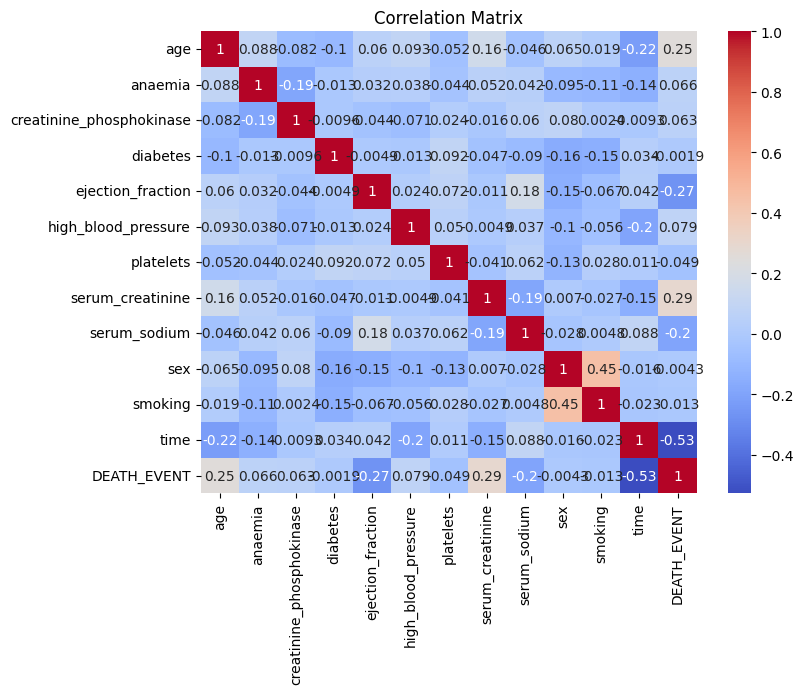

In [13]:
# Count plot for target
sns.countplot(data=df, x='DEATH_EVENT')
plt.title("Death Event Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
# Initialize Logistic Regression
model = LogisticRegression(
    penalty='l2',         # L2 Regularization (Ridge)
    C=1.0,                # Regularization strength
    solver='liblinear',   # Works well for small datasets
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 81.67%

Confusion Matrix:
 [[34  1]
 [10 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86        35
           1       0.94      0.60      0.73        25

    accuracy                           0.82        60
   macro avg       0.86      0.79      0.80        60
weighted avg       0.84      0.82      0.81        60



In [17]:
import joblib
# Save model
joblib.dump(model, 'model.joblib')
# Save the scaler (assuming you used StandardScaler)
joblib.dump(scaler, 'scaler.joblib')

print("✅ Model and scaler saved successfully.")

✅ Model and scaler saved successfully.
